<a href="https://colab.research.google.com/github/ayu1521/Analyzing-Website-Traffic-Data_Ayush_Prasad_2428cseai2215/blob/main/MSE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving traffic_data.csv to traffic_data (6).csv
Using file: traffic_data (6).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            20 non-null     object 
 1   PageViews       20 non-null     int64  
 2   UniqueVisitors  20 non-null     int64  
 3   BounceRate      20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 772.0+ bytes
None

First few rows:
         Date  PageViews  UniqueVisitors  BounceRate
0  2024-01-01        828            1261   54.420009
1  2024-01-02       7065            4225   31.583887
2  2024-01-03       5861            3286   68.284703
3  2024-01-04       7163             651   60.203175
4  2024-01-05       9432             548   37.963247


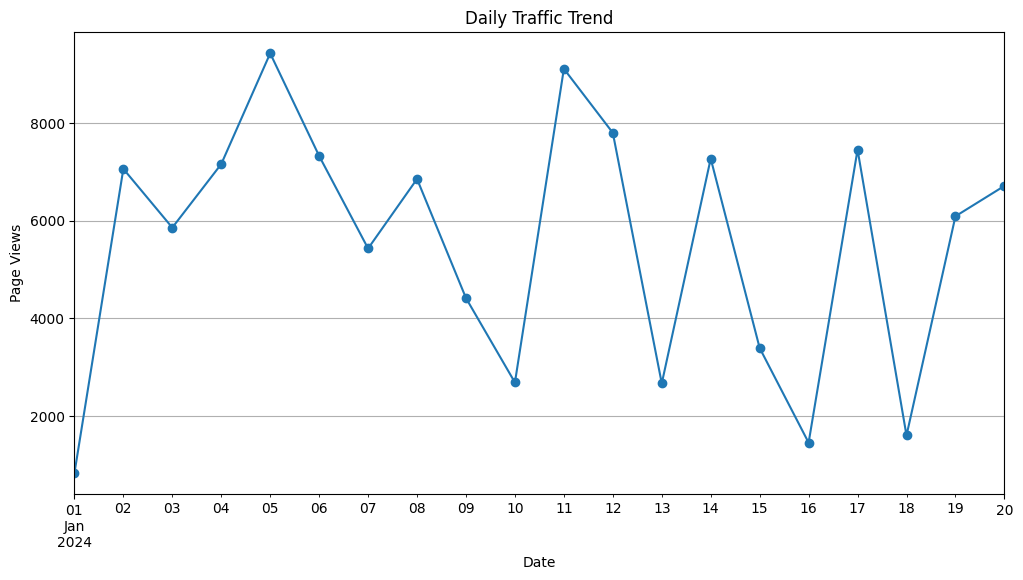


Summary Statistics:
        PageViews  UniqueVisitors  BounceRate
count    20.00000        20.00000   20.000000
mean   5533.20000      2435.05000   49.150658
std    2595.96585      1383.40109   15.286241
min     828.00000       518.00000   28.581849
25%    3218.50000      1115.25000   37.609458
50%    6405.00000      2466.50000   49.061288
75%    7288.75000      3696.25000   60.163514
max    9432.00000      4459.00000   79.981676


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Upload file using Colab's file upload
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
print("Using file:", file_name)

# Load the data
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Enable inline plotting in Colab
%matplotlib inline

# Convert "Date" column to datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure datetime column is properly set as index for time series
df.set_index('Date', inplace=True)

# Traffic trend over time
plt.figure(figsize=(12, 6))
df['PageViews'].plot(title='Daily Traffic Trend', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.grid(True)
plt.show()

# Peak hours analysis (Not applicable since there's no "hour" column)
if 'hour' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='hour', data=df, palette='viridis')
    plt.title('Traffic Distribution by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Visits')
    plt.grid(True)
    plt.show()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())
